# Heart Failure Prediction

**Reference**
- [Heart Fail:Analysis and Quick-prediction (NAYAN SAKHIYA)](https://www.kaggle.com/code/nayansakhiya/heart-fail-analysis-and-quick-prediction)

In [43]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


## Data Preprocessing

In [44]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('./heart_failure_clinical_records_dataset.csv')
#df = df.drop(df.loc[df['creatinine_phosphokinase']>3000].index, axis=0)
#df = pd.get_dummies(df)

float_columns = [x for x in df.columns if x not in ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking', 'DEATH_EVENT']]
sc = StandardScaler()
df2 = df.copy()
df[float_columns] = sc.fit_transform(df[float_columns])

#df.to_csv('Heart_Failure_scaled.csv', encoding='utf-8-sig')

X = df.drop(['DEATH_EVENT'], axis=1)
T = df['DEATH_EVENT']
X.head(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,1.192945,0,0.000166,0,-1.530560,1,1.681648e-02,0.490057,-1.504036,1,0,-1.629502
1,-0.491279,0,7.514640,0,-0.007077,0,7.535660e-09,-0.284552,-0.141976,1,0,-1.603691
2,0.350833,0,-0.449939,0,-1.530560,0,-1.038073e+00,-0.090900,-1.731046,1,1,-1.590785
3,-0.912335,1,-0.486071,0,-1.530560,0,-5.464741e-01,0.490057,0.085034,1,0,-1.590785
4,0.350833,1,-0.435486,1,-1.530560,0,6.517986e-01,1.264666,-4.682176,0,0,-1.577879
5,2.456114,1,-0.552141,0,0.162199,1,-6.079240e-01,0.683709,-1.050016,1,1,-1.577879
6,1.192945,1,-0.346704,0,-1.953749,0,-1.396531e+00,-0.187726,0.085034,1,0,-1.552067
7,-0.070223,1,-0.275472,1,1.854958,0,1.952488e+00,-0.284552,-1.277026,1,1,-1.552067
8,0.350833,0,-0.438583,0,2.278147,0,7.535660e-09,0.102752,0.312044,0,0,-1.552067
9,1.614001,1,-0.473683,0,-0.260991,1,1.276539e+00,7.752020,-0.823006,1,1,-1.552067


## Train Test Split

In [45]:
from sklearn.model_selection import train_test_split

Features = ['age', 'ejection_fraction', 'serum_creatinine']
X = df[Features]
#X = df.drop(['time','DEATH_EVENT'], axis=1)
print(X)
x_train, x_test, y_train, y_test = train_test_split(X, T, test_size=0.3, random_state=1)

          age  ejection_fraction  serum_creatinine
0    1.192945          -1.530560          0.490057
1   -0.491279          -0.007077         -0.284552
2    0.350833          -1.530560         -0.090900
3   -0.912335          -1.530560          0.490057
4    0.350833          -1.530560          1.264666
..        ...                ...               ...
294  0.098199          -0.007077         -0.284552
295 -0.491279          -0.007077         -0.187726
296 -1.333392           1.854958         -0.575031
297 -1.333392          -0.007077          0.005926
298 -0.912335           0.585389          0.199578

[299 rows x 3 columns]


## Modeling

In [46]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from colorama import Fore
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

accuracy_list=[]

### Logistic Regression
- 종속변수가 이분형일 때 수행할 수 있는 회귀 분석 기법의 한 종류
- 오차를 기반으로 학습을 수행
- **장점**
    - 종속변수와 독립변수 사이의 관계가 비선형으로 식별되기 때문에 정규분포의 가정이 독립변수에 적용되지 않는다.
    - 명목형, 연속형, 순서형을 비롯한 다양한 독립 변수에 다양한 자료 유형을 사용할 수 있기 때문에 복잡한 현상을 설명할 수 있다.
    - 로지스틱회귀분석의 결과에는 각 요인에 대한 여러 분석값이 포함된다. 이러한 분서값은 다른 지역을 대상으로 하는 유사한 연구에 사용될 수 있다.
- **단점**
    - 종속변수가 발생할 가능성을 결정하기 위해 최적화된 회귀 방정식을 찾기 위한 계산을 반복하기 때문에 계산 프로세스를 추적할 수 없다는 점에서 한계가 있다.

- **계산식**
$
z = b_0 + b_1x_1 + b_2x_2 + \dots + b_nx_n \\
\text{P} = 1/(1+e^{-z}) \qquad \leftarrow \textbf{Sigmoid function} \\
\text{J}(w) = -\cfrac{1}{n} \sum \limits _{i=1}^{n}[y^{(i)}\log H(x^{(i)}) + (1-y^{(i)})\log (1-H(x^{(i)}))]
\qquad \leftarrow \textbf{Loss function(Cross Entropy)}
$

In [47]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=1000,
                             #verbose=2
                            )
log_reg.fit(x_train, y_train)
log_reg_pred = log_reg.predict(x_test)
log_reg_acc = accuracy_score(y_test, log_reg_pred)
accuracy_list.append(100*log_reg_acc)
print(classification_report(y_test, log_reg_pred))

              precision    recall  f1-score   support

           0       0.80      0.92      0.86        64
           1       0.69      0.42      0.52        26

    accuracy                           0.78        90
   macro avg       0.74      0.67      0.69        90
weighted avg       0.77      0.78      0.76        90



In [48]:
print(Fore.GREEN + f"Accuracy of Logistic Regression is: {100*log_reg_acc:.2f}%")

Accuracy of Logistic Regression is: 77.78%


<Figure size 432x288 with 0 Axes>

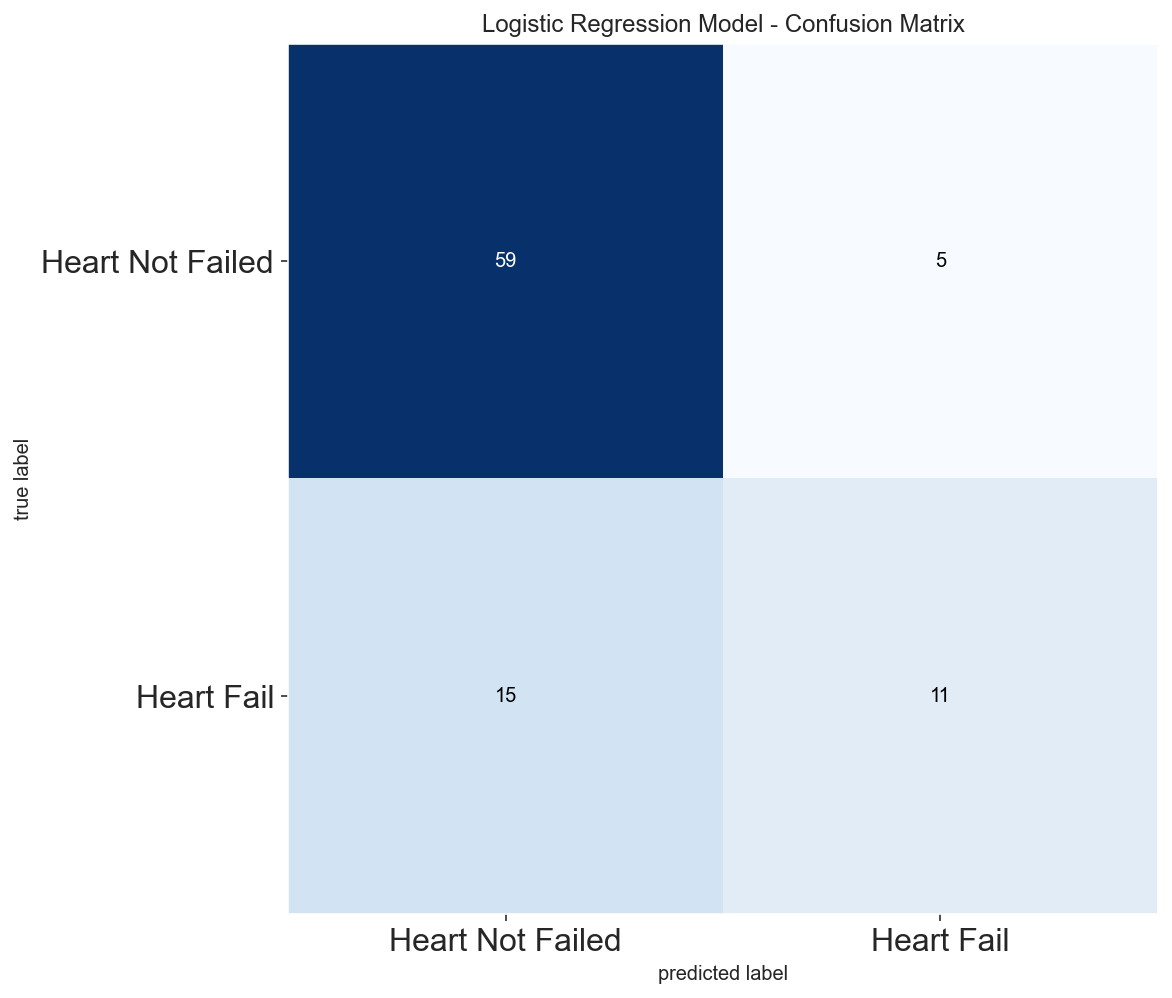

In [49]:
cm = confusion_matrix(y_test, log_reg_pred)
plt.figure()
plot_confusion_matrix(cm, figsize = (12,8), hide_ticks=True, cmap=plt.cm.Blues)
plt.title("Logistic Regression Model - Confusion Matrix")
plt.xticks(range(2), ["Heart Not Failed", "Heart Fail"], fontsize=16)
plt.yticks(range(2), ["Heart Not Failed", "Heart Fail"], fontsize=16)
plt.show()

### Support Vector
- 기본틀은 Linear Regression
- MSE와 같은 오차가 아닌 **Margin**을 기반으로 학습
- **계산식**
$
\textbf{w}^Tx+\textbf{b} = 0\\
\qquad \textbf{w}\text{: normal vector(2차원에서 직선의 기울기와 같은 개념)} \\
\qquad \textbf{b}\text{: bias(절편)} \\
$
1. $\textbf{Margin}\text{: 데이터 포인트와 hyperplane 사이의 거리. 각 클래스의 데이터 중에서 경계선에 가장 가까이 있는 것.} \\
\textbf{w}^Tx_{+} + \textbf{b} = 1 \\
\textbf{w}^Tx_{-} + \textbf{b} = -1
$
2. $\textbf{Support Vector}\text{: margin에서 hyperplane과 가장 가까이 있는 데이터 포인트} \\
\text{즉, hyperplane과}\: (\frac{1}{2}\text{margin})\text{만큼 떨어져 있는 경계에 있으면서 margin decision에 영향을 주는 관측치}
$
3. $\textbf{Kernel Trick}\text{: 커널은 실수, 함수, 벡터 등을 x,y 인자로 받고 실수를 출력하는 함수} \\
\text{커널 트릭은 이런 커널 함수를 이용하여 데이터를 한 단계 높은 차원에서 보는 것}
$

In [50]:
from sklearn.svm import SVC

sv_clf = SVC()
sv_clf.fit(x_train, y_train)
sv_clf_pred = sv_clf.predict(x_test)
sv_clf_acc = accuracy_score(y_test, sv_clf_pred)
accuracy_list.append(100*sv_clf_acc)

In [51]:
print(Fore.GREEN + f"Accuracy of SVC is: {100*sv_clf_acc:.2f}%")

Accuracy of SVC is: 78.89%


<Figure size 432x288 with 0 Axes>

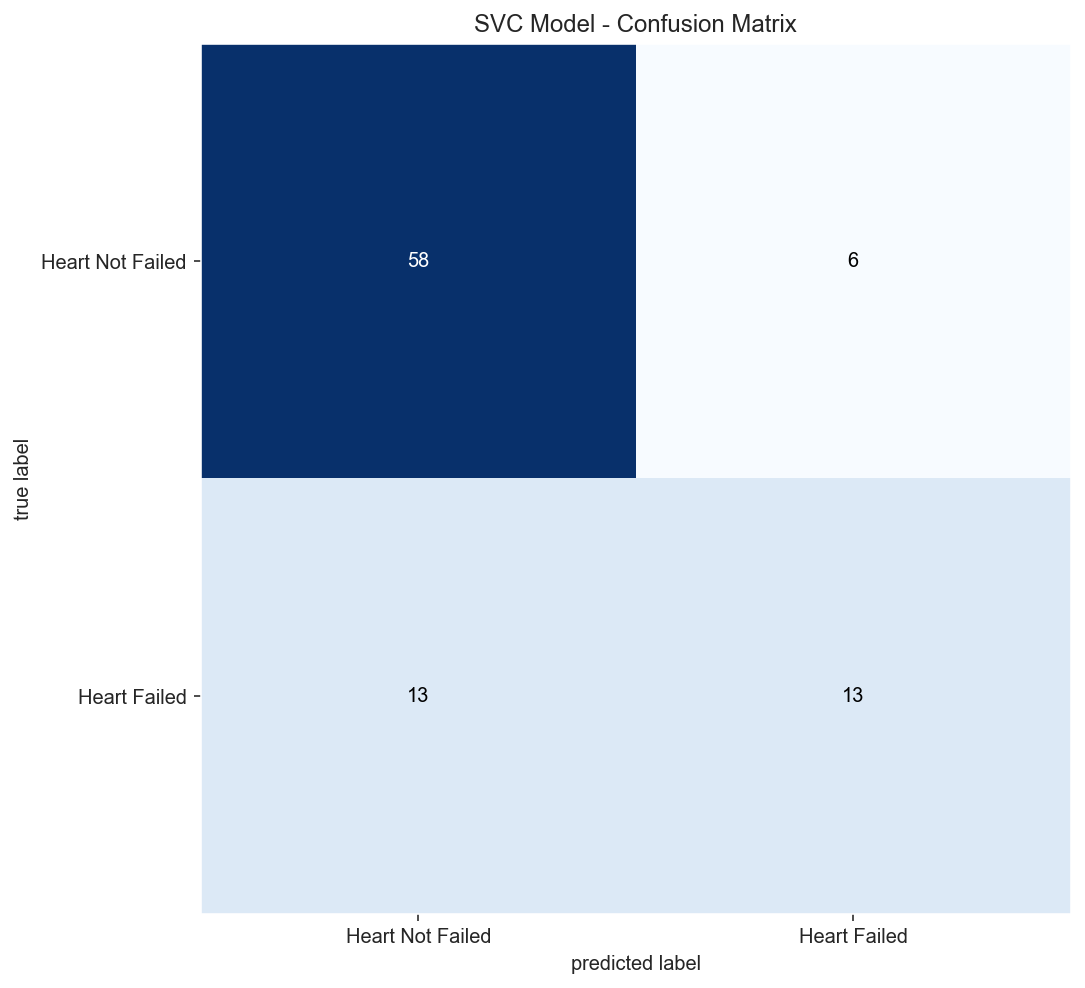

In [52]:
cm = confusion_matrix(y_test, sv_clf_pred)
plt.figure()
plot_confusion_matrix(cm, figsize=(12, 8), hide_ticks=True, cmap = plt.cm.Blues)
plt.title("SVC Model - Confusion Matrix")
plt.xticks(range(2), ['Heart Not Failed','Heart Failed'])
plt.yticks(range(2), ['Heart Not Failed','Heart Failed'])
plt.show()

### K Neighbors Classifier

In [53]:
from sklearn.neighbors import KNeighborsClassifier

kn_clf = KNeighborsClassifier(n_neighbors=6)
kn_clf.fit(x_train, y_train)
kn_pred = kn_clf.predict(x_test)
kn_acc = accuracy_score(y_test, kn_pred)
accuracy_list.append(100*kn_acc)

In [54]:
print(Fore.GREEN + f"Accuracy of K Neighbors Classifier is : {100*kn_acc:.2f}%")

Accuracy of K Neighbors Classifier is : 74.44%


<Figure size 432x288 with 0 Axes>

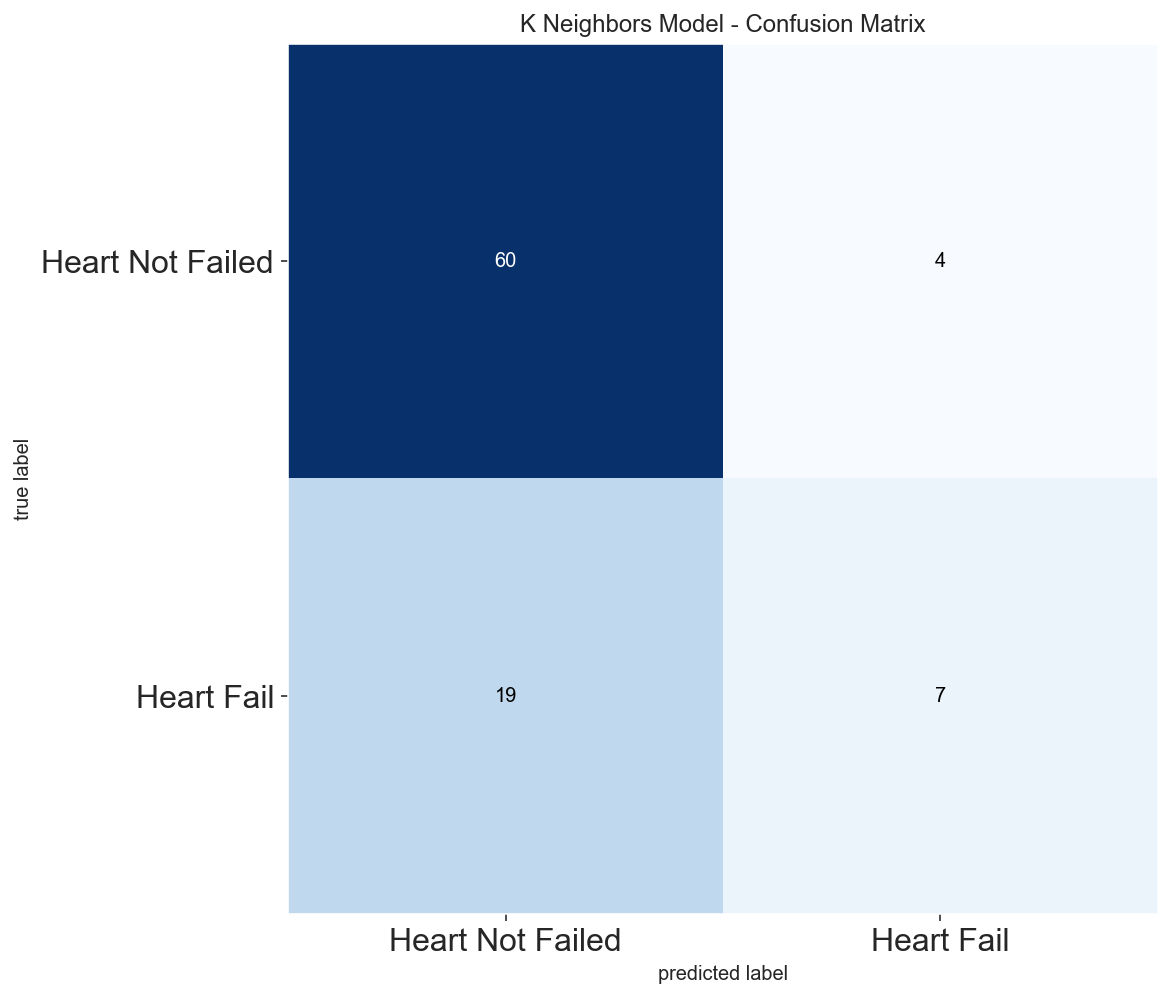

In [55]:
cm = confusion_matrix(y_test, kn_pred)

plt.figure()
plot_confusion_matrix(cm, figsize=(12, 8), hide_ticks=True, cmap=plt.cm.Blues)
plt.title("K Neighbors Model - Confusion Matrix")
plt.xticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.yticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.show()

### Decision Tree Classifier
- Decision Tree: 데이터를 특정 기준으로(yes/no) **이진 분류**를 시키면서 특징별로 분류하는 모델
- Classification과 Regression 모두 가능한 지도 학습 모델

- 단점
    - 모든 feature을 갖고 분류를 했을 경우 **과적합**이 이뤄지는 경우가 많음
    - 이런 부분을 보안하여 나온 모델이 **Random Forest**
- 보완
    - 가지치기(Pruning)
        - 트리에 가지가 너무 많으면 오버피팅이라고 볼 수 있음
        - 최대 깊이나 터미널 노드의 최대개수 혹은 한 노드가 분할하기 위한 최소 데이터 수를 제한할 필요가 있음
        - `min_sample_split`: 한 노드에 들어있는 최소 데이터 수 고정
            - `min_sample_split=10`: 한 노드에 10개의 데이터가 있으면 더이상 분기를 하지 않음
        - `max_depth`: 최대 깊이를 지정
            - `max_depth=4`: 깊이가 4보다 크게 가지를 치지 않음
- **Algorithm**: Entropy, Impurity
    - **Impurity**
        - 한 범주에 하나의 데이터만: Impurity 최소
        - 한 범주에 서로 다른 두 데이터가 정확히 반반: Impurity 최대
        - Decision Tree는 Impurity를 최소화하는 방향으로 학습을 진행
    - **Entropy**
        - Impurity를 수치적으로 나타낸 척도
        - Entropy가 높다: Impurity가 크다 (최대: Entropy==1)
        - Entropy가 낮다: Impurity가 낮다 (최소: Entropy==0)
        - $\textbf{Entropy} = - \sum \limits _i(P_i)\log _2(p_i)\\
        (\textbf{P}_i = \text{한 영역 안에 존재하는 데이터 가운데 범주 i에 속하는 데이터의 비율})$
    - **Information gain**
        - 엔트로피가 1인 상태에서 0.7로 바뀐다면 정보획득(Informatino gain)은 0.3
        - $\textbf{Information gain} = \textbf{Entropy}(\text{parent})-[\textbf{weighted average}]\textbf{Entropy}(\text{children})$
        - **Entropy(parent)**: 분기 이전 엔트로피
        - **Entropy(children)**: 분기 이후 엔트로피
        - **Weighted average**: 가중평균, 분기를 하면 범주가 2개 이상으로 쪼개지기 때문에 가중평균을 활용
- **Decision Tree Algrorithm**은 **Information gain**을 최대화 하는 방향으로 학습이 진행
    - 어느 feature의 어느 분기점에서 정보획득이 최대화되는지 판단해서 분기

In [56]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(max_leaf_nodes=3, random_state=0, criterion='entropy')
dt_clf.fit(x_train, y_train)
dt_pred = dt_clf.predict(x_test)
dt_acc = accuracy_score(y_test, dt_pred)
accuracy_list.append(100*dt_acc)

In [57]:
print(Fore.GREEN + "Accuracy of Decision Tree Classifier is : ", "{:.2f}%".format(100* dt_acc))

Accuracy of Decision Tree Classifier is :  72.22%


<Figure size 432x288 with 0 Axes>

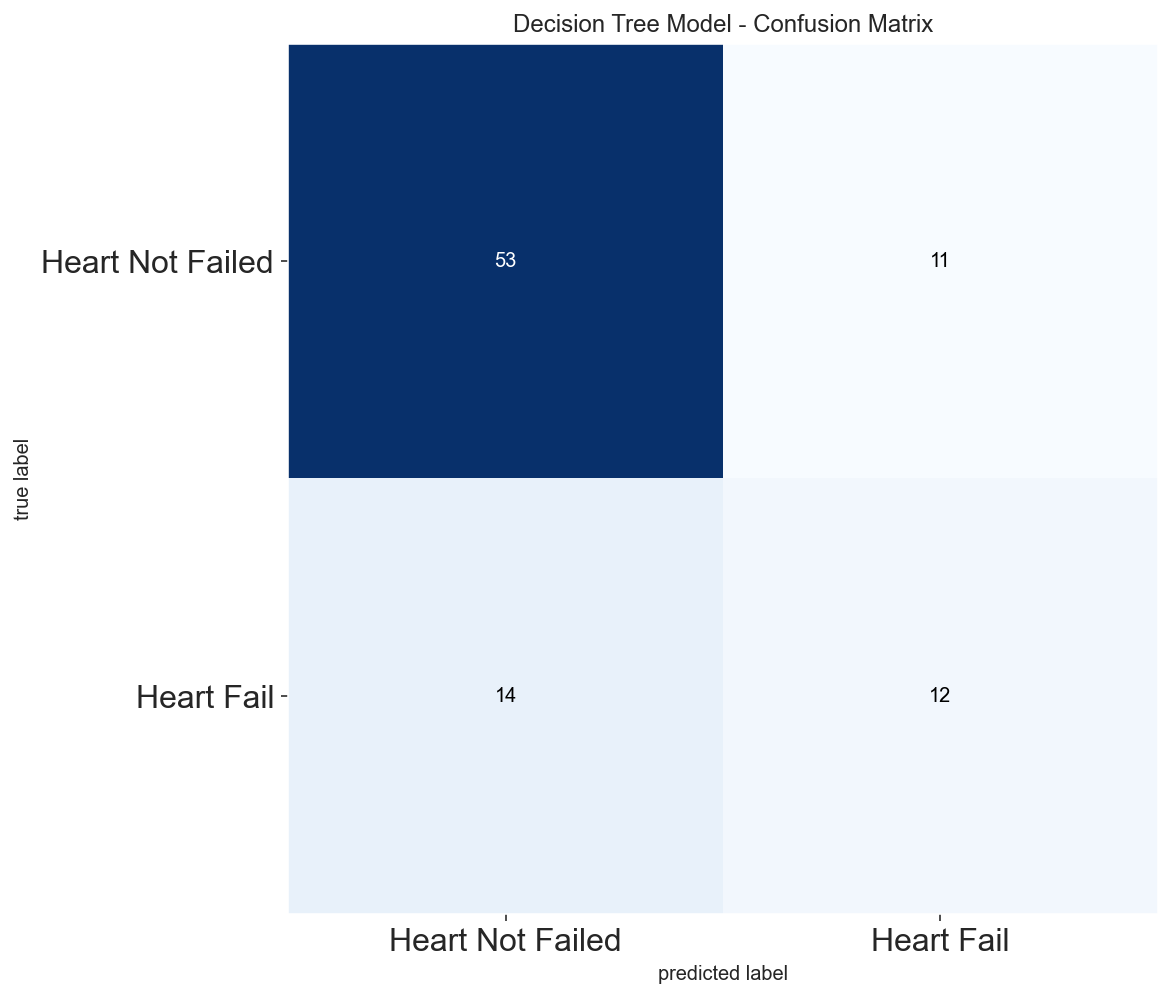

In [58]:
cm = confusion_matrix(y_test, dt_pred)
plt.figure()
plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Blues)
plt.title("Decision Tree Model - Confusion Matrix")
plt.xticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.yticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.show()

### Random Forest Classifier
- Decision Tree의 과적합 등의 문제를 보안하여 나온 모델
- 여러개의 Decision Tree들이 모여 **Bagging Ensemble**한 모델
    - 예) Feature가 총 100개가 있을 때, 100개를 모두 사용하면 overfit되기 때문에 10~20개 정도를 선택해서 만든 **Decision Tree를 여러개 만들어서 Forest를 만듬**
    - 핵심은 **여러 개**의 Weak Classifier를 결합하여 Strong Classifier를 만드는 것 (**Ensemble Learning**)
    - 즉, 하나의 깊이가 깊은 Decision Tree를 만드는 것이 아닌 여러 개의 작은 Decision Tree를 만드는 것
    - 여러 개의 작은 Decision Tree가 예측한 값들 중 가장 많은 값 혹은 평균값을 최종 예측값으로 정함
    - 여러 개의 Decision Tree들의 경계를 평균내어 Random Forest를 만듬
- `n_estimators`: Random Forest 안의 결정트리 개수. 
    - 해당 값이 클수록 더 깔끔한 Decision Boundary가 형성. 메모리와 Learning Time 증가
- `max_features`: 무작위로 선택할 Feature 개수
    - 해당 값이 전체 Feature 수와 같으면 전체 Feature 모두를 사용해서 Decision Tree를 형성.
    - Bootstrap Params가 False면, 비복원 추출을 하기 때문에 전체 Features를 사용해서 트리를 형성
    - Bootstrap Params가 True면, 복원 추출해서 트리를 만듬. (*default: bootstrap=True)
    - 해당 값이 크면 Random Forest의 Tree들이 매우 비슷해지고, 가장 두드러진 특성에 맞게 예측을 할 것
    - 해당 값이 작으면 Random Forest의 Tree들이 서로 매우 달라짐. Overfitting은 감소.
    - 일반적으로 default값을 사용

**Ensemble**
- 여러 개의 Decision Tree를 결합하여 하나의 결정 트리보다 더 좋은 성능을 내는 머신러닝 기법
- Ensemble의 핵심
    - 여러 개의 약 분류기(Weak Classifier)를 결합하여 강 분류기(Strong Classifier)를 만드는 것
- 2가지 학습법
    1. Bagging
    
    2. Boosting

**Bootstrap**
- 모수의 분포를 추정하는 좋은 방법은 현재 있는 표본에서 추가적으로 표본을 **복원 추출**하고 각 표본에 대한 통계량을 다시 계산하는 것
- 이러한 절차를 부트스트랩이라고 함
- 데이터가 정규분포를 따라야한다는 가정이 꼭 필요하지는 않음
예) 1억개의 모집단에서 뽑은 200개의 표본이 있을 때, 이 200개를 기준으로 복원 추출하여 새로운 통계량을 구하는 것
    1. 200개의 표본 중 하나를 뽑아 기록하고 원위치
    2. 위 과정을 n번 반복
    3. n번 재표본추출한 값의 평균을 구함
    4. 1~3 단계를 R번 반복 (**R: 부트스트랩 반복 횟수**)
    5. 평균에 대한 결과 R개를 사용하여 신뢰구간 결정
- 위 방법을 통해 표본이 200개밖에 없을지라도 200개보다 더 많은 통계량을 구할 수 있음

**Bagging**
- **Bootstrap Aggregation**의 약자
- Sample을 여러 번 뽑아(**Bootstrap**) 각 모델을 학습시켜 결과물을 집계(**Aggregation**)하는 방법
1. 데이터로부터 Bootstrap 실행.
2. Bootstrap한 데이터로 모델 학습
3. 학습된 모델의 결과를 집계하여 최정 결과값 도출
4. Categorical Data는 투표방식(Voting)으로 결과를 집계하며, Continuous Data는 평균으로 집계
    - **Categorical Data**: 전체 모델에서 예측한 값 중 가장 많은 값을 최종 예측값으로 선정
    - 6개 결정트리 모델이 있을 때, 4개는 A로, 2개는 B로 예측했다면, A를 최종 결과로 예측
    - **Continuous Data**: 결정 트리 모델이 예측한 값에 평균을 취해 최종 Bagging Model의 예측값을 결정

<img src="./Bagging.png" width="700px" height="250px" title="Bagging"></img>

**Boosting**
- 가중치를 활용하여 약 분류기를 강 분류기로 만드는 방법
- **Bagging**은 Decision Tree1, Decision Tree2가 각각 독립적으로 결과를 예측. 여러 개의 독립적인 Decision Tree가 각각 값을 예측한 뒤 그 결과값을 집계(Aggregation)하여 최종 결과값을 예측
- **Boosting**은 모델 간 팀워크가 이뤄짐.
- 처음 모델이 예측을 하면 그 예측 결과에 따라 데이터에 가중치가 부여되고, 부여된 가중치가 다음 모델에 영향을 줌
- 잘못 분류된 데이터에 집중하여 새로운 분류 규칙을 만드는 단계를 반복

<img src="./Boosting.png" width="700px" height="400px" title="Boosting"></img>

**Bagging and Boosting**
<img src="./BaggingnBoosting.png" width="700px" height="250px" title="Bagging&Boosting"></img>
- **Bagging**: 병렬로 학습
- **Boosting**
    1. 순차적으로 학습. 
    2. 학습 후 결과에 따라 가중치 부여. 
    3. 부여된 가중치가 다음 결과 예측에 영향
    - 오답에 대해서는 높은 가중치를 부여, 정답에 대해서는 낮은 가중치를 부여
    - 오답을 정답으로 맞추기 위해 오답에 더 집중
    - Boosting이 상대적으로 Error가 더 낮음
    - 하지만 속도가 느리고 Overfitting될 가능성이 있음
- 개별 결정 트리의 **낮은 성능**이 문제 -> Boosting이 적합
- **오버피팅**이 문제 -> Bagging이 적합

In [59]:
from sklearn.ensemble import RandomForestClassifier

r_clf = RandomForestClassifier(max_features=0.5, max_depth=15, random_state=1)
r_clf.fit(x_train, y_train)
r_pred = r_clf.predict(x_test)
r_acc = accuracy_score(y_test, r_pred)
accuracy_list.append(100*r_acc)

In [60]:
print(Fore.GREEN + "Accuracy of Random Forest Classifier is : ", "{:.2f}%".format(100* r_acc))

Accuracy of Random Forest Classifier is :  78.89%


<Figure size 432x288 with 0 Axes>

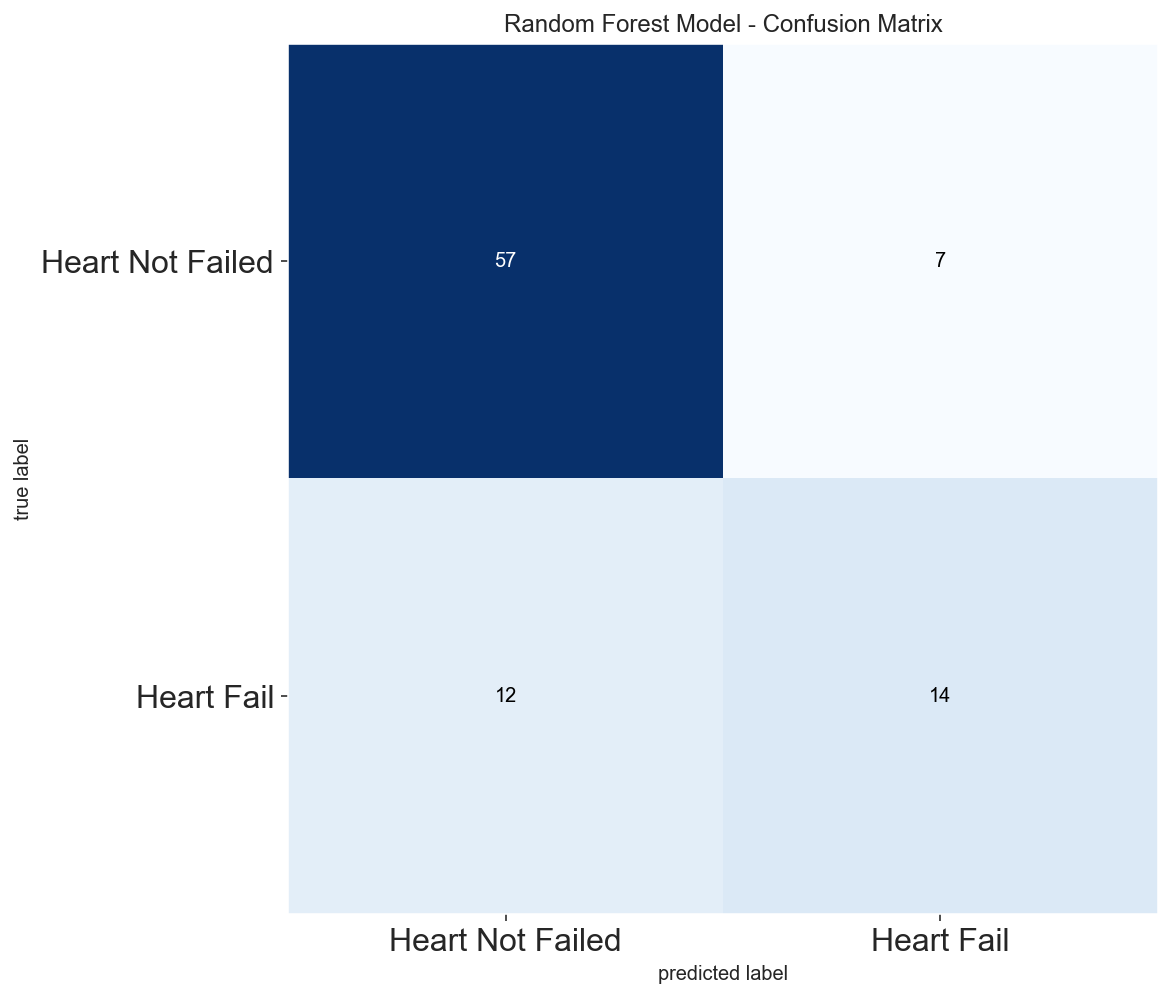

In [61]:
cm = confusion_matrix(y_test, r_pred)
plt.figure()
plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Blues)
plt.title("Random Forest Model - Confusion Matrix")
plt.xticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.yticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.show()

### Gradient Boosting Classifier
- **Bagging**: Random Forest
- **Boosting**: AdaBoost, Gradient Boost
- Gradient Boost: 회귀와 분류에서 모두 사용이 가능

- **Gradient Boost의 변형 모델**  
    1) XGBoost  
    2) LightBoost  
    3) CatBoost

**AdaBoost**  
[Reference](https://bkshin.tistory.com/entry/머신러닝-14-AdaBoost)
- 하나의 Node에 두 개의 Leaf를 지닌 Tree를 Stump라고 함
- AdaBoost는 여러 개의 Stump로 구성
- Tree와 다르게 Stump는 정확한 분류를 하지 못함
    - 여러 질문을 통해 데이터를 분류하는 Tree와는 다르게, Stump는 하나의 질문으로 데이터를 분류해야함
    - 따라서 Stump는 약한 학습기로 분류(Weak Learner)

**RandomForest**는 여러 개의 Tree의 결과를 합산해 최종 결과를 도출. 각각의 Tree는 동등한 가중치를 가짐
<img src="./RandomForest.png" width="400px" height="250px" title="RandomForest"></img>

**AdaBoost**는 특정 Stump가 다른 Stump보다 더 중요. 즉, 가중치가 더 높음(="**Amount of Say가 높다**","**결과에 미치는 영향이 크다**")
<img src="./AdaBoost.png" width="400px" height="250px" title="AdaBoost"></img>
- 첫 번째 Stump에서 발생한 Error는 두 번째 Stump의 결과에 영향
- 두 번째 Stump에서 발생한 Error는 세 번째 Stump의 결과에 영햐
- ...

**결론**  
1) 약한 학습기(Weak Learner)로 구성. 약한 학습기는 Stump 형태  
2) 어떤 Stump는 다른 Stump보다 가중치가 높음(Amount of Say가 크다)  
3) 각 Stump의 Error는 다음 Stump의 결과에 영향을 미침

**AdaBoost 작동 원리**  
- Sample이 8개, Training Feature가 3개일 때 (8x3 Matrix)  
0) 초기 Sample Weight는 1/n으로 설정(=1/8)  
1) 각 Feature마다 Stump 생산  
2) 각 Feature들의 **Gini Index**를 구한 뒤 가장 작은 Gini Index에 해당하는 Feature의 Stump를 첫 Stump로 지정  
3) Amoun of Say를 구함  
    - 모든 Sample Weight의 합은 1이므로, Total Error는 0과 1 사이의 값을 갖음
    - Total Error가 Amount of Say를 결정
    - Amount of Say는 최종 분류에 있어서 해당 Stump가 얼마만큼의 영향을 주는가를 뜻함
    - **공식**  
    $
    \textbf{Amount of Say} = \cfrac{1}{2}\log\cfrac{1-\text{Total Error}}{\text{Total Error}}
    $
<img src="./AmountofSay.png" width="300px" height="50px" title="AmountofSay"></img>
- X축은 Total Error, Y축은 Amount of Say
- Total Error가 0이면 Amount of Say는 굉장히 큰 양수
- Total Error가 1이면 Amount of Say는 굉장히 작은 음수
- Total Error가 0.5이면 Amount of Say는 0(의미가 없음)  
4) Sample Weight Settitng
    - **공식**  
    $\textbf{New Sample Weight} = \text{Sample Weight}\times e^\text{Amount of Say}$
    - **예)**  
    $\textbf{이전 Stump에서 잘못 분류된 Sample}$
    $\rightarrow\text{Total Error} = \cfrac{1}{8},$
    $\rightarrow\text{Amount of Say} = \cfrac{1}{2} \log (\cfrac{1-\cfrac{1}{8}}{\cfrac{1}{8}}) = 0.97$
    $\rightarrow\text{New Sample Weight} = \cfrac{1}{8}\times e^{0.97} = \cfrac{1}{8}\times{2.64} = 0.33$
    $\text{기존 weight인 0.125보다 커졌다}$
    $\textbf{이전 Stump에서 맞게 분류된 Sample}$
    $\rightarrow\text{New Sample Weight} = \cfrac{1}{8}\times e^{-0.97} = \cfrac{1}{8}\times{0.38} = 0.05$
    $\text{기존 weight인 0.125보다 작아졌다}$
    $\text{이전 Stump에서 잘못 분류한 Sample에는 Sample Weight를 높여주고, 제대로 분류한 Sample에는 Sample Weight를 낮춤}$
    $\text{그래야 다음 Stump에서 이전 Stump에서 잘못 분류한 것에 더 집중해서 올바르게 분류해줌}$
    $\text{이후 새로 구해진 New Sample Weight들을 Normalization}$
- New Table  
5) Sampling으로 새로운 테이블을 생성
    - 0부터 1까지 숫자를 무작위로 선택
    - 0.00~0.07 사이 숫자가 나오면 첫 번째 Sample을 선택
    - 0.07~0.14 사이 숫자가 나오면 두 번째 Sample을 선택
    - 0.14~0.21 사이 숫자가 나오면 세 번째 Sample을 선택
    - 0.21~0.70 사이 숫자가 나오면 네 번째 Sample을 선택 (상대적으로 많이 선택됨)
- Repeat  
6) 원래 테이블은 지우고 Sampling한 새로운 테이블을 가져옴  
7) 모든 Sample의 Weight는 다시 1/n로 초기화(=1/8)  
8) 1)단계부터 반복

**최종분류**
- 여러 차례 진행하면 각 Stump마다 Amount of Say가 나옴
- 각 Stump의 Amount of Say를 더하면 Total Amount of Say가 나오며, Total Amount of Say값이 큰쪽으로 선택

**AdaBoost와 Gradient Boost의 차이**


In [62]:
from sklearn.ensemble import GradientBoostingClassifier

gradientboost_clf = GradientBoostingClassifier(max_depth=2, random_state=1)
gradientboost_clf.fit(x_train, y_train)
gradientboost_pred = gradientboost_clf.predict(x_test)
gradientboost_acc = accuracy_score(y_test, gradientboost_pred)
accuracy_list.append(100*gradientboost_acc)

In [63]:
print(Fore.GREEN + "Accuracy of Gradient Boosting is : ", "{:.2f}%".format(100* gradientboost_acc))

Accuracy of Gradient Boosting is :  74.44%


<Figure size 432x288 with 0 Axes>

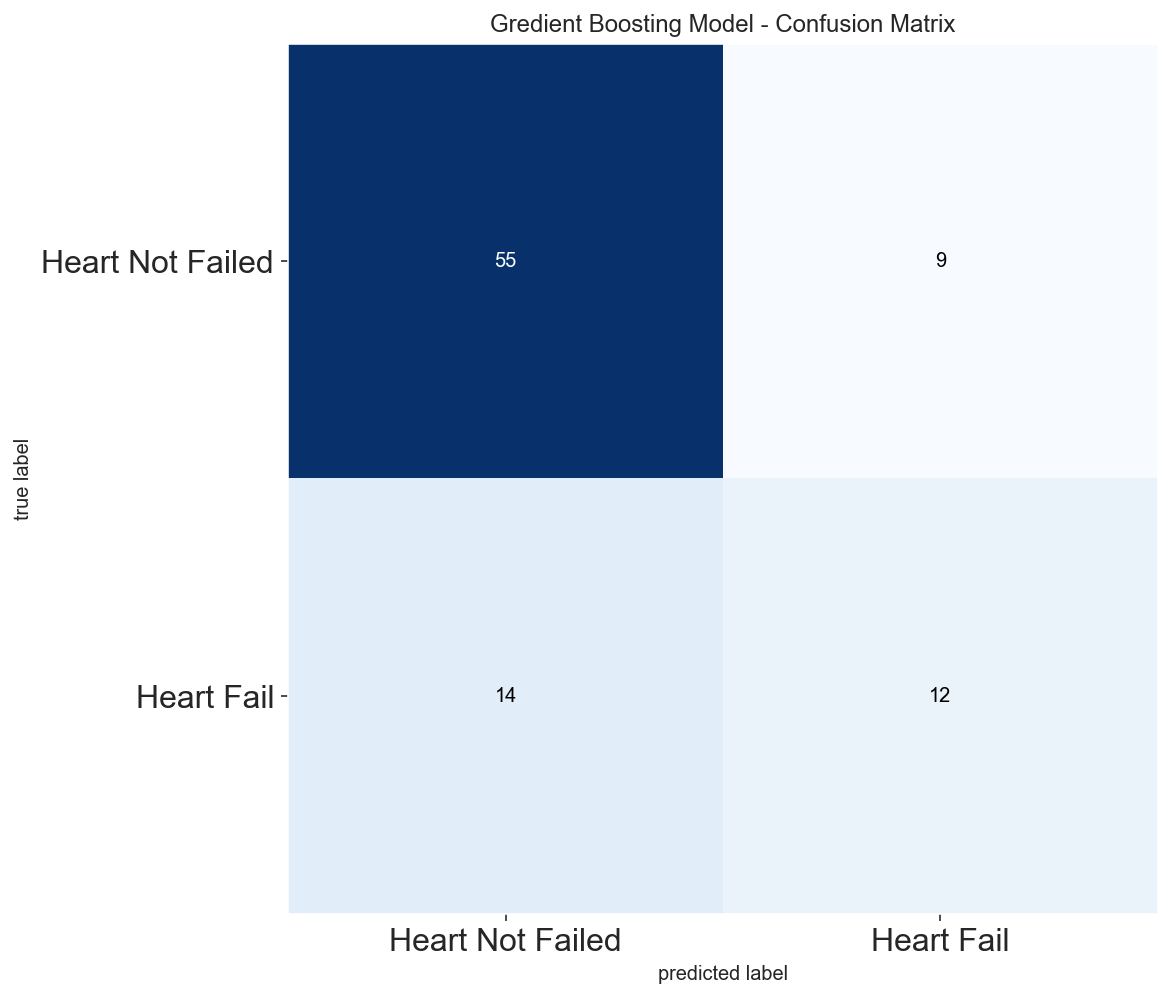

In [64]:
cm = confusion_matrix(y_test, gradientboost_pred)
plt.figure()
plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Blues)
plt.title("Gredient Boosting Model - Confusion Matrix")
plt.xticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.yticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.show()

### XGBoost
- 여러개의 의사결정나무를 앙상블한 알고리즘
- XGBoost는 RandomForest와 달리 **Gradient Boosting 앙상블**로 구현된 모델
- boosting방식이란, **한 개의 예측모델**에 대한 error를 줄이는 방식의 앙상블 기법
    - 예) 첫 번째 의사결정 나무가 있어 이를 통한 예측 모델이 있을 때, 이것의 오차값을 다시 의사결정나무로 오차를 줄이고 그 오차를 똑같은 방식으로 줄여나가는 방식
- Gradient boost(GBM)와 같은 방식의 앙상블 모델이지만, **병렬 학습**이 지원되어 더 빠른 학습이 가능해짐
- Level-wise tree

In [65]:
from xgboost import XGBClassifier
xgb_clf = XGBClassifier(eval_metric='mlogloss',
                            use_label_encoder =False,
                            max_depth=3,
                            random_state=1)
xgb_clf.fit(x_train, y_train)
xgb_pred = xgb_clf.predict(x_test)
xgb_acc = accuracy_score(y_test, xgb_pred)

print(classification_report(y_test, xgb_pred))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83        64
           1       0.57      0.46      0.51        26

    accuracy                           0.74        90
   macro avg       0.68      0.66      0.67        90
weighted avg       0.73      0.74      0.74        90



In [66]:
print(Fore.GREEN + "Accuracy of XGBClassifier is : ", "{:.2f}%".format(100* xgb_acc))

Accuracy of XGBClassifier is :  74.44%


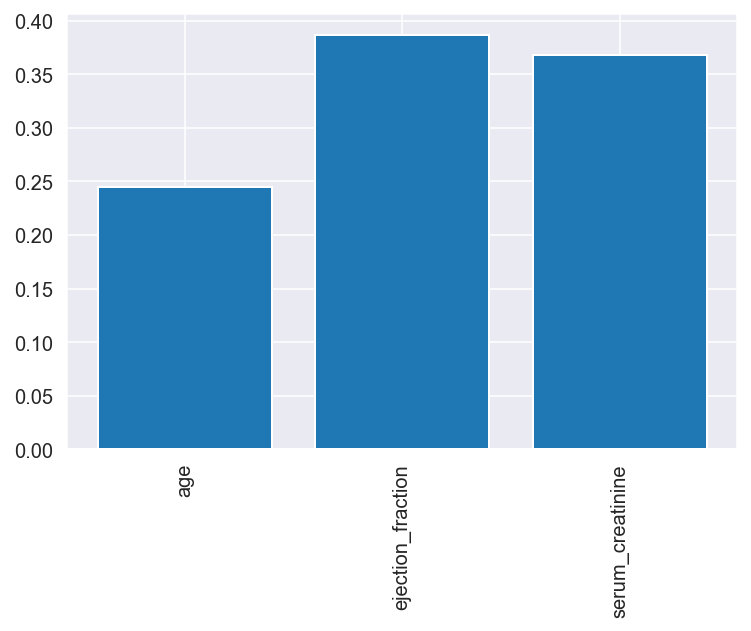

In [67]:
plt.bar(X.columns, xgb_clf.feature_importances_)
plt.xticks(rotation=90)
plt.show()

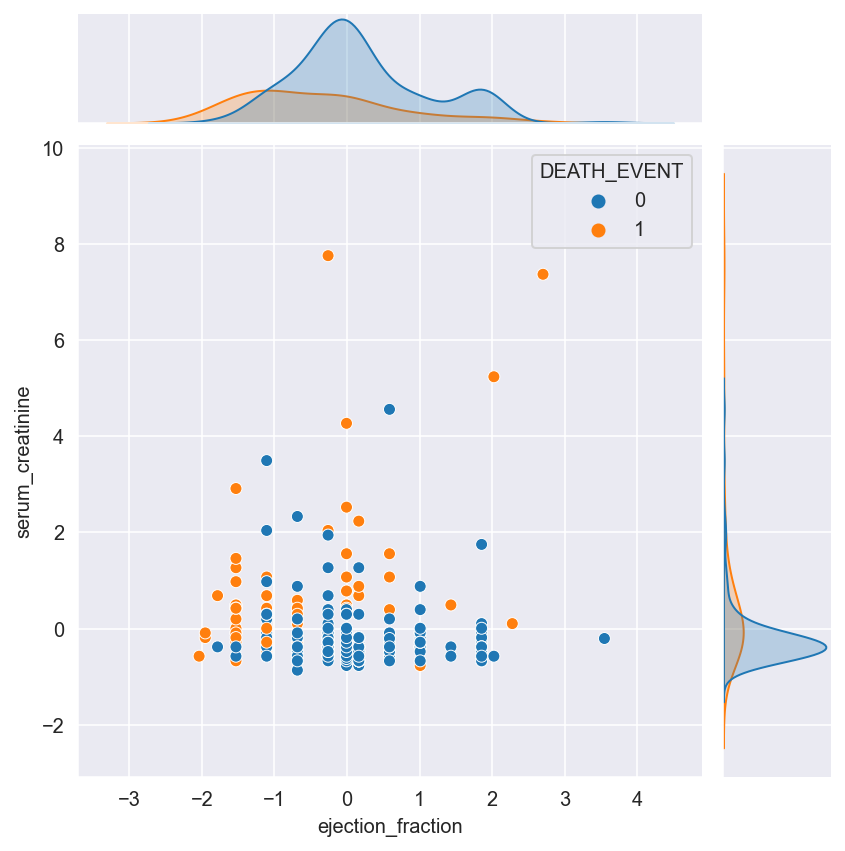

In [68]:
import seaborn as sns
sns.jointplot(x='ejection_fraction', y='serum_creatinine', data=df, hue='DEATH_EVENT')
plt.show()

### Precision Recall Curve

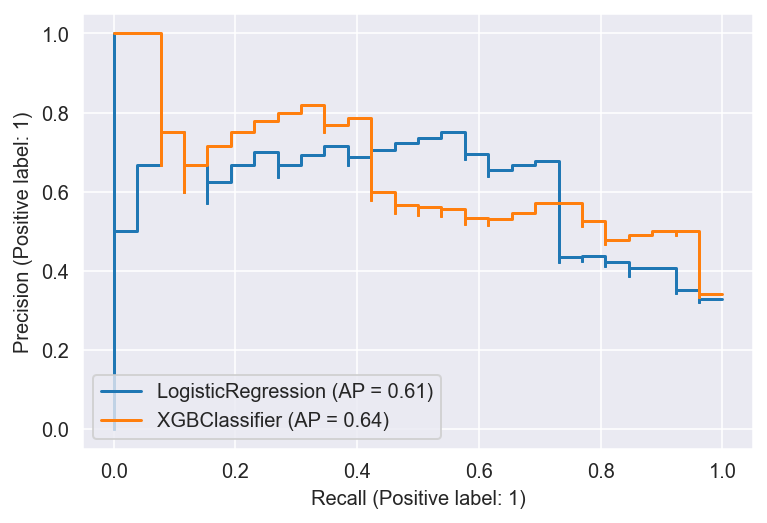

In [69]:
from sklearn.metrics import plot_precision_recall_curve

fig = plt.figure()
ax = fig.gca()
plot_precision_recall_curve(log_reg, x_test, y_test, ax=ax) #AP값이 클수록 Recall을 할 수록 잘 유지했다는 것
plot_precision_recall_curve(xgb_clf, x_test, y_test, ax=ax)
plt.show()

### ROC Curve

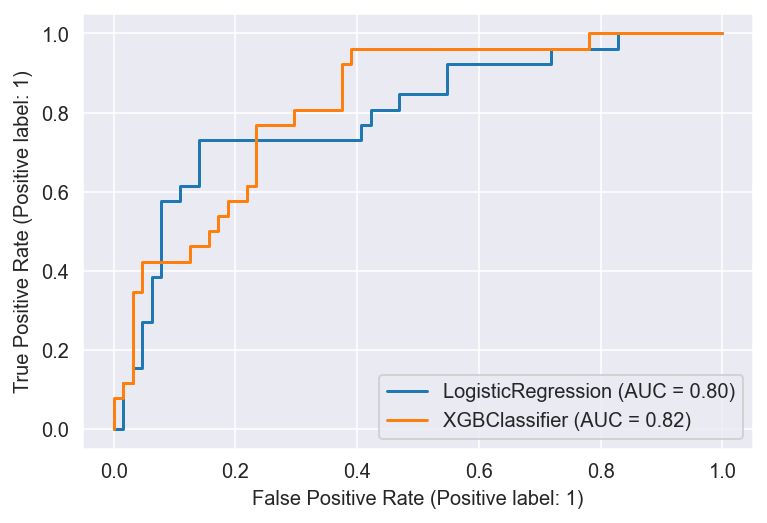

In [70]:
from sklearn.metrics import plot_roc_curve

fig = plt.figure()
ax = fig.gca()
plot_roc_curve(log_reg, x_test, y_test, ax=ax) #위쪽에 그려질 수록 좋은 모델, AUC 값이 클수록 좋음
plot_roc_curve(xgb_clf, x_test, y_test, ax=ax)
plt.show()

### XGBRF Classifier (XGBoost Random Forest)
[Reference1](https://cppsecrets.com/users/1512411697110100114105109971151051101031049752495764103109971051084699111109/PYTHON-XGBOOST-RANDOM-FOREST-AS-XGBOOST-MODEL.php)  
[Reference2](https://xgboost.readthedocs.io/en/stable/tutorials/rf.html)  
**XGBoost** also comes with XGBRFRegressor and **XGBRFClassifier** to build **Random Forests**
- `n_estimators`: Speifies the size of the forest to be trained(not gradient boosting but bagging trees in one round only);
    - It is converted to `num_parallel_tree`, instead of the number of boosting rounds
- `learning_rate`: Set to 1 by default
- `subsample`: must be set to a value less than 1 to enable random selection of training cases(rows)
- One of `colsample_by*`: must be set to a value less than 1 to enable random selection of columns
    - Normally, `colsample_bynode` would be set to a value less than 1 to randomly sample columns at each tree split 
    - Scikit-learn's random forest keeps these defaults at 1, making the default XGBRFRegressor and XGBRFClassifier is **less prone to overfitting**(*default: 0.8)
- `num_parallel_tree`: Set to the size of the forest being trained
- `num_boost_round`: Set to 1 to prevent XGBoost from boosting multiple random forests
- `eta`:  (alias: `learning_rate`) must be set to 1 when training random forest regression
- `random_state`
- `booster`: Always `gbtree`

**Sample**  
`params = {
  'colsample_bynode': 0.8,
  'learning_rate': 1,
  'max_depth': 5,
  'num_parallel_tree': 100,
  'objective': 'binary:logistic',
  'subsample': 0.8,
  'tree_method': 'gpu_hist'
}`

In [71]:
from xgboost import XGBRFClassifier

xgbrf_clf = XGBRFClassifier(eval_metric='mlogloss',
                            use_label_encoder =False,
                            max_depth=3,
                            random_state=1)
xgbrf_clf.fit(x_train, y_train)
xgbrf_pred = xgbrf_clf.predict(x_test)
xgbrf_acc = accuracy_score(y_test, xgbrf_pred)
accuracy_list.append(100*xgbrf_acc)
                     
print(classification_report(y_test, xgbrf_pred))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86        64
           1       0.68      0.58      0.62        26

    accuracy                           0.80        90
   macro avg       0.76      0.73      0.74        90
weighted avg       0.79      0.80      0.79        90



In [72]:
print(Fore.GREEN + "Accuracy of XGBRFClassifier is : ", "{:.2f}%".format(100* xgbrf_acc))

Accuracy of XGBRFClassifier is :  80.00%


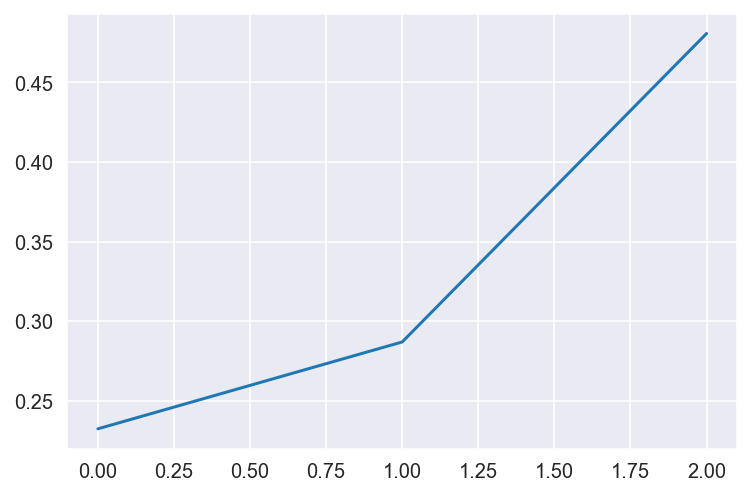

In [73]:
plt.plot(xgbrf_clf.feature_importances_)

### LGBM Classifier


[**Reference...**](https://nurilee.com/2020/04/03/lightgbm-definition-parameter-tuning/)
- **Gradient Boosting Framework**
- ML Algorithm based on **Tree Model**
    - Light GBM: **Tree가 수직적으로 확장**
        - Leaf-wise 방식
        <img src="./Leaf_wise_tree_growth.png" width="500px" height="400px" title="Leaf_wise"></img>
    - Others: **Tree가 수평적으로 확장**
        - Level-wise 방식
        <img src="./Level_wise_tree_growth.png" width="400px" height="250px" title="Level_wise"></img>

- **Light GBM이 인기를 얻게된 이유**
    - 속도가 빠름
    - 큰 사이즈의 데이터를 다룰 수 있으며 적은 메모리 공간을 차지
    - 정확도가 높음
    - GPU 학습을 지원
    - 병렬 처리 지원
- **Light GBM 사용처**
    - 작은 데이터셋에는 부적합
    - Overfitting에 민감
    - row size에 대한 제한은 없으나 10,000개 이상에 권장
- **Light GBM 구현**
    - Parameter tuning이 복잡 (100개 이상)

**Parameters**  
- `max_depth`: 
    - Tree의 최대 깊이. 과적합을 해결할 때 사용
- `min_data_in_leaf`: 
    - Leaf가 가지고 있는 최소한의 레코드 수
    - 과적합을 해결할 때 사용
    - 큰 값으로 세팅함으로써 Tree가 너무 깊게 확장되는 것을 방지할 수 있음
        - 하지만 underfitting이 발생할 수 있음
    - 관행적으로 수백~수천 개로 정하는 것이 큰 데이터셋에서 충분
    - *default value 20
- `feature_fraction`:
    - Boosting이 Random Forest일 경우 사용
    - 0.8 feature_fraction
        - Light GBMdl Tree를 만들 때 매번 각각의 iteration 반복에서 파라미터 중에 80%를 랜덤하게 선택
- `bagging_fraction`:
    - 매번 iteration을 돌 때 사용되는 데이터의 일부를 선택하는데 트레이닝 속도를 높이고 과적합을 방지할 때 주로 사용
- `early_stopping_round`:
    - 분석 속도를 높이는데 도움을 줌
    - 모델은 만약 어떤 validation 데이터 중 하나의 지표가 지난 early_stopping_round 라운드에서 향상되지 않았다면 학습을 중단함
        - 이는 지나친 iteration을 줄이는데 도움을 줌
- `lambda`:
    - lambda값은 regularization 정규화를 함
    - 0~1 사이
- `min_gain_to_split`:
    - 분기하기 위해 필요한 최소한의 gain을 의미
    - Tree의 유용한 분기수를 컨트롤하는데 사용
- `max_cat_group`:
    - 카테고리 수가 클 때, 과적합을 방지하는 분기포인트를 찾음
    - Light GBM 알고리즘이 카테고리 그룹을 max_cat_group 그룹으로 합치고 그룹 경계선에서 분기 포인트를 찾음
    - *default value 64

**Core Parameters**
- `Task`:
    - 데이터에 대해서 수행하고자 하는 임무를 구체화
    - training or prediction
- `application`:
    - 가장 중요한 파라미터로, 모델의 어플리케이션을 정함
    - regression or classification
    - dafault value $\text{regression}$
        - regression: 회귀분석
        - binary: 이진 분류
        - multiclass: 다중 분류
- `boosting`:
    - 실행하고자 하는 알고리즘 타입을 정의
    - default value $\text{gdbt}$
        - gdbt: Traditional Gradient Boosting Decision Tree
        - rf: Random Forest
        - dart: Dropouts meet Multiple Additive Regression Trees
        - goss: Gradient-based One-Side Sampling
- `num_boost_round`:
    - boosting iteration 수로 일반적으로 100 이상
- `learning_rate`:
    - 최종 결과에 대한 각각의 Tree에 영향을 미치는 변수
    - GBM은 초기 수정값에서 시작하여 각각의 Tree 결과를 사용하여 추정값을 업데이트
    - 학습 파라미터는 이러한 추정에서 발생하는 변화의 크기를 컨트롤
    - 일반적인 값으로 0.1, 0.001, 0.003 등이 있음
- `num_leaves`:
    - Tree 모델의 복잡성을 컨트롤하는 주요 파라미터
    - 전체 Tree의 leaves 수를 나타냄
    - 이상적으로 num_leaves 값은 2**(max_depth)값보다 적거나 같아야 함
        - 이 것보다 많으면 과적합 유발
    - default value 31
- `device`:
    - default value $\text{cpu}$

**Metric Parameter**
- `metric`:
    - 모델을 구현할 때 손실을 정리하기 때문에 중요한 변수 중 하나
    - regression과 classification을 위한 일반적인 손실 값으로
        - mae: mean absolute error
        - mse: mean squared error
        - binary_logloss: loss for binary classification
        - multi_logloss: loss for multi classification

**IO Parameter**
- `max_bin`:
    - feature 값의 최대 bin 수를 의미  
- `categorical_features`:
    - 범주형 feature 인덱스를 의미
    - categorical_features가 0,1,2 이면 column 0, column 1, column 2가 범주형 변수들
- `ignore_column`:
    - categorical_features와 거의 동일
    - feature로써 특정 칼럼을 고려하지 않음 (해당 변수들을 무시)
- `save_binary`:
    - 데이터 파일의 메모리 사이즈를 처리해야한다면 해당 파라미터를 True로 설정
    - 해당 값이 True일 때, 데이터 세트는 바이너리 파일로 저장
    - 이 바이너리 파일은 다음에 데이터를 읽어올 때 그 속도를 줄여줌

**더 빠른 속도**
- `bagging_fraction` & `baggin_freq`를 설정하여 bagging을 적용
- `feature_fraction`을 설정하여 feature sub-sampling을 시도
- 작은 `max_bin` 값 적용
- `save_binary`를 통해 향후 학습에서 데이터 로딩 속도를 감소
- parallel learning 시도

**더 높은 정확도**
- 큰 `max_bin` 값 적용
- 작은 `learning_rate`값을 큰 `num_iterations`값과 함께 적용
- 큰 `num_leaves`값을 사용 (과적합을 유발)
- 더 큰 traing data 사용
- dart 사용
- categorical feature 사용

**과적합 해결**
- 작은 `max_bin` 값 사용
- 작은 `num_leaves` 값을 사용
- `min_data_in_leaf`와 `min_sum_hessian_in_leaf` 파라미터를 사용
- `bagging_fraction`과 `bagging_freq`를 사용하여 bagging을 적용
- `feature_fraction`을 설정하여 feature sub-sampling을 시도
- lambda_l1, lambda_l2 그리고 `min_gain_to_split` 파라미터를 이용해 regularization을 적용
- `max_depth`를 설정해서 Deep Tree가 만들어지는 것을 방지

In [74]:
import lightgbm as lgb

lgb_clf = lgb.LGBMClassifier(max_depth=2,random_state=4)
lgb_clf.fit(x_train, y_train)
lgb_pred = lgb_clf.predict(x_test)
lgb_acc = accuracy_score(y_test, lgb_pred)
accuracy_list.append(100*lgb_acc)

In [75]:
print(Fore.GREEN + f'Accuracy of LGBM Classifier is : {100*lgb_acc:.2f}%')

Accuracy of LGBM Classifier is : 76.67%


<Figure size 432x288 with 0 Axes>

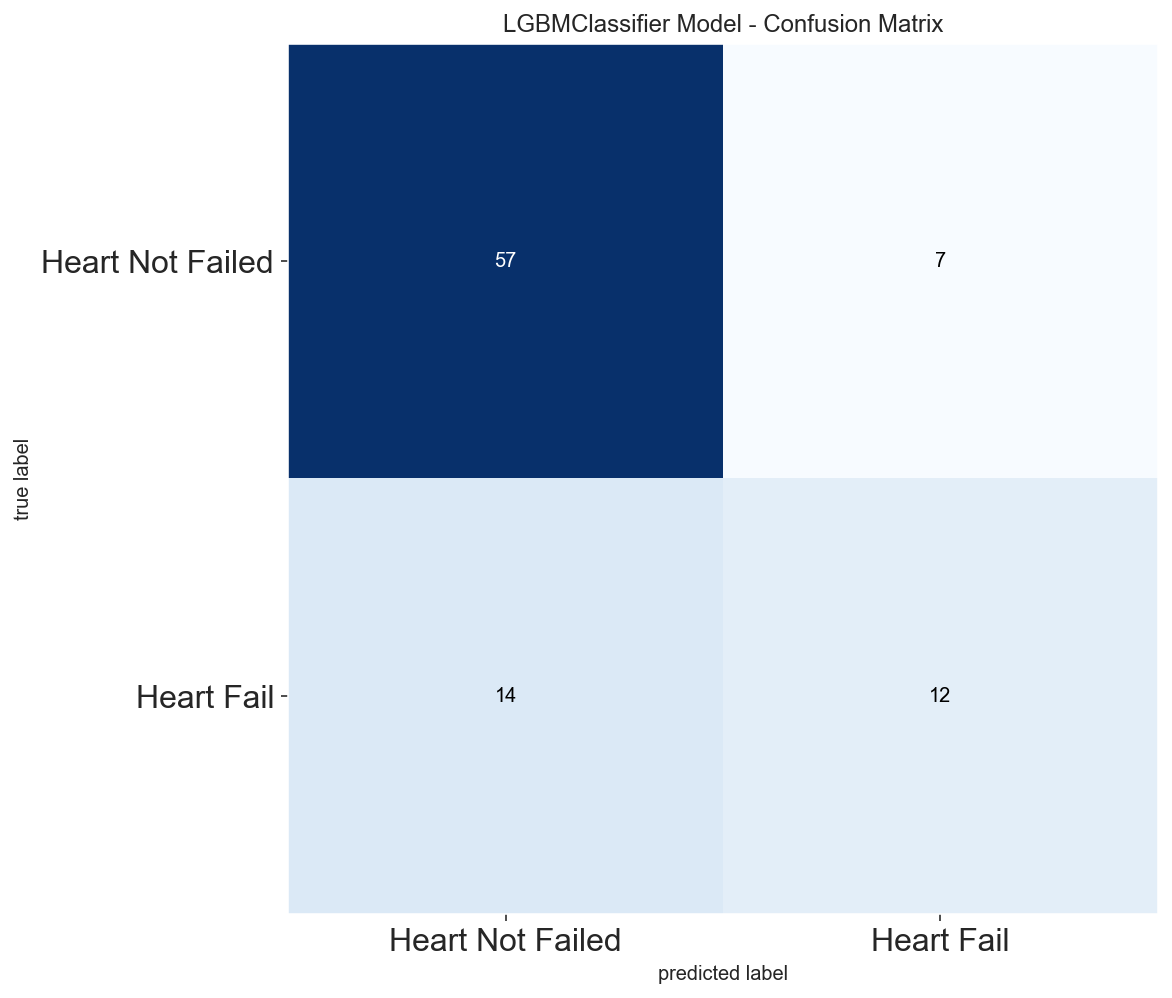

In [76]:
cm = confusion_matrix(y_test, lgb_pred)
plt.figure()
plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Blues)
plt.title("LGBMClassifier Model - Confusion Matrix")
plt.xticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.yticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.show()

In [77]:
d_train = lgb.Dataset(x_train, label=y_train)
params={}
params['boosting_type'] = 'gbdt'
params['num_leaves'] = 2
params['max_depth'] = 2
#params['max_bin'] = 1000
params['learning_rate'] = 0.1
params['force_row_wise']=True
params['objective'] = 'binary'

lgb_clf2 = lgb.train(params, d_train)

[LightGBM] [Info] Number of positive: 70, number of negative: 139
[LightGBM] [Info] Total Bins 67
[LightGBM] [Info] Number of data points in the train set: 209, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.334928 -> initscore=-0.685979
[LightGBM] [Info] Start training from score -0.685979


In [78]:
import numpy as np

lgb_pred2 = lgb_clf2.predict(x_test)
preds_ld = lgb_pred2.flatten()
pred_class = np.where(preds_ld >=0.5, 1, 0)
lgb_acc2 = accuracy_score(y_test, pred_class)
print(Fore.GREEN + f'Accuracy of LGBM Classifier is : {100*lgb_acc2:.2f}%')

Accuracy of LGBM Classifier is : 75.56%


### Cat Boost Classifier
- LightGBM의 과적합 문제점을 해결하기 위해 만들어진 모델
- 범주형 변수의 예측모델에 최적화
1. **Level-wise 방식의 모델 생성**
2. **Ordered boosting 방식으로 부스팅**
    - General boosting은 **전체적인 오차**에 대한 값으로 모델을 앙상블
    - Ordered boosting은 **부분의 오차**에 대해 모델을 생성하고 데이터들을 늘려나감
        - 이 방식으로 과적합을 줄임
3. **Ordered Target Encoding(Mean Encoding) 범주형 변수 변환**
    - 독립변수의 범주형 변수가 종속변수의 평균으로 인코딩
    - 독립변수가 일반적인 0,1으로 인코딩했을 때보다 data와의 연관성이 생김
4. **Categorical Feature Combinations 범주형 변수 결합**
    - 연관된 범주형 변수를 자동으로 결합시켜줌으로써 변수를 줄임
- **장점**: 범주형 변수에 대해서 특정 인코딩 방식을 통해 정확도와 속도를 높임
- **단점**: 연속형 변수가 많을 경우 catboost 속도가 현저하게 떨어짐
- 결과적으로 catboost를 사용할 때 변수들을 범주형으로 만들려는 노력을 많이해야함

In [79]:
from catboost import CatBoostClassifier

cat_clf = CatBoostClassifier()
cat_clf.fit(x_train,y_train)
cat_pred = cat_clf.predict(x_test)
cat_acc = accuracy_score(y_test, cat_pred)
accuracy_list.append(100*cat_acc)

Learning rate set to 0.00528
0:	learn: 0.6906382	total: 1.67ms	remaining: 1.67s
1:	learn: 0.6888626	total: 3.67ms	remaining: 1.83s
2:	learn: 0.6861952	total: 4.47ms	remaining: 1.49s
3:	learn: 0.6841590	total: 4.86ms	remaining: 1.21s
4:	learn: 0.6818751	total: 5.06ms	remaining: 1.01s
5:	learn: 0.6797982	total: 5.49ms	remaining: 909ms
6:	learn: 0.6772450	total: 5.69ms	remaining: 807ms
7:	learn: 0.6757997	total: 5.77ms	remaining: 715ms
8:	learn: 0.6733027	total: 6.57ms	remaining: 723ms
9:	learn: 0.6713005	total: 6.74ms	remaining: 668ms
10:	learn: 0.6693304	total: 6.9ms	remaining: 621ms
11:	learn: 0.6675637	total: 7.03ms	remaining: 579ms
12:	learn: 0.6659445	total: 7.23ms	remaining: 549ms
13:	learn: 0.6640806	total: 7.43ms	remaining: 523ms
14:	learn: 0.6619090	total: 7.56ms	remaining: 496ms
15:	learn: 0.6596213	total: 7.68ms	remaining: 473ms
16:	learn: 0.6573162	total: 7.81ms	remaining: 452ms
17:	learn: 0.6558709	total: 8.15ms	remaining: 445ms
18:	learn: 0.6539712	total: 8.23ms	remaining: 

465:	learn: 0.3778048	total: 143ms	remaining: 164ms
466:	learn: 0.3774783	total: 144ms	remaining: 164ms
467:	learn: 0.3773728	total: 144ms	remaining: 164ms
468:	learn: 0.3772259	total: 144ms	remaining: 163ms
469:	learn: 0.3770086	total: 145ms	remaining: 163ms
470:	learn: 0.3769956	total: 145ms	remaining: 163ms
471:	learn: 0.3768288	total: 145ms	remaining: 162ms
472:	learn: 0.3765942	total: 145ms	remaining: 162ms
473:	learn: 0.3764055	total: 146ms	remaining: 162ms
474:	learn: 0.3759943	total: 146ms	remaining: 161ms
475:	learn: 0.3758487	total: 146ms	remaining: 161ms
476:	learn: 0.3756406	total: 147ms	remaining: 161ms
477:	learn: 0.3753060	total: 147ms	remaining: 160ms
478:	learn: 0.3751285	total: 147ms	remaining: 160ms
479:	learn: 0.3750100	total: 148ms	remaining: 160ms
480:	learn: 0.3748611	total: 148ms	remaining: 160ms
481:	learn: 0.3746319	total: 148ms	remaining: 159ms
482:	learn: 0.3745351	total: 149ms	remaining: 159ms
483:	learn: 0.3744620	total: 149ms	remaining: 159ms
484:	learn: 

746:	learn: 0.3316721	total: 227ms	remaining: 77ms
747:	learn: 0.3316232	total: 228ms	remaining: 76.8ms
748:	learn: 0.3314363	total: 228ms	remaining: 76.5ms
749:	learn: 0.3313014	total: 229ms	remaining: 76.2ms
750:	learn: 0.3311452	total: 229ms	remaining: 75.9ms
751:	learn: 0.3310196	total: 229ms	remaining: 75.5ms
752:	learn: 0.3309107	total: 229ms	remaining: 75.2ms
753:	learn: 0.3308303	total: 229ms	remaining: 74.9ms
754:	learn: 0.3307019	total: 230ms	remaining: 74.5ms
755:	learn: 0.3306537	total: 230ms	remaining: 74.2ms
756:	learn: 0.3305165	total: 230ms	remaining: 73.9ms
757:	learn: 0.3303748	total: 231ms	remaining: 73.6ms
758:	learn: 0.3302687	total: 231ms	remaining: 73.3ms
759:	learn: 0.3301563	total: 231ms	remaining: 73ms
760:	learn: 0.3300439	total: 231ms	remaining: 72.6ms
761:	learn: 0.3298207	total: 232ms	remaining: 72.4ms
762:	learn: 0.3297033	total: 232ms	remaining: 72.1ms
763:	learn: 0.3295825	total: 232ms	remaining: 71.7ms
764:	learn: 0.3295096	total: 232ms	remaining: 71.4

In [80]:
print(Fore.GREEN + "Accuracy of CatBoostClassifier is : ","{:.2f}%".format(100* cat_acc))

Accuracy of CatBoostClassifier is :  76.67%


<Figure size 432x288 with 0 Axes>

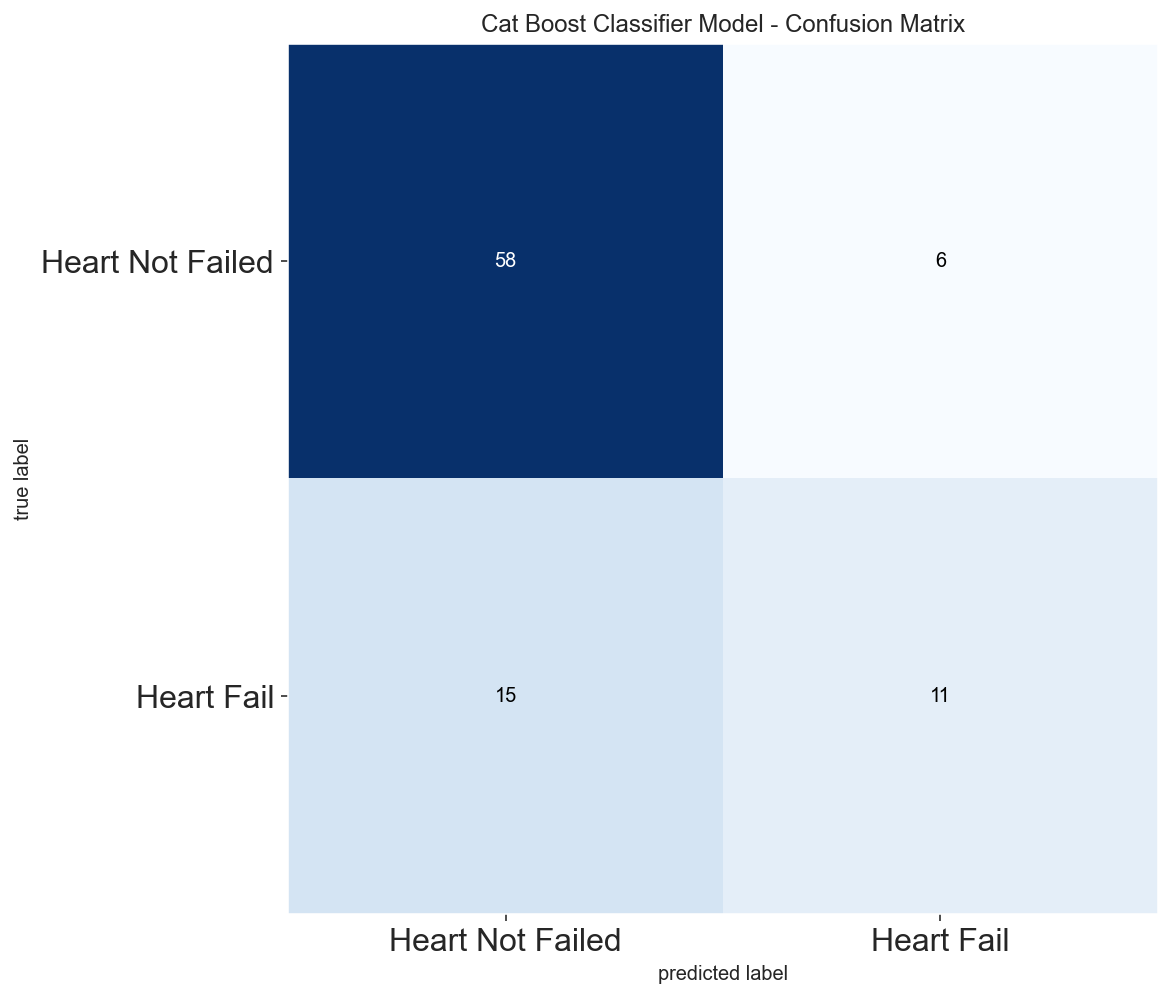

In [81]:
cm = confusion_matrix(y_test, cat_pred)
plt.figure()
plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Blues)
plt.title("Cat Boost Classifier Model - Confusion Matrix")
plt.xticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.yticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.show()

In [82]:
model_list = ['Logistic Regression', 'SVC','KNearestNeighbours', 'DecisionTree', 'RandomForest',
              'GradientBooster', 'XGBRF','LGBM', 'CatBoostClassifier']

In [83]:
print(accuracy_list)

[77.77777777777779, 78.88888888888889, 74.44444444444444, 72.22222222222221, 78.88888888888889, 74.44444444444444, 80.0, 76.66666666666667, 76.66666666666667]


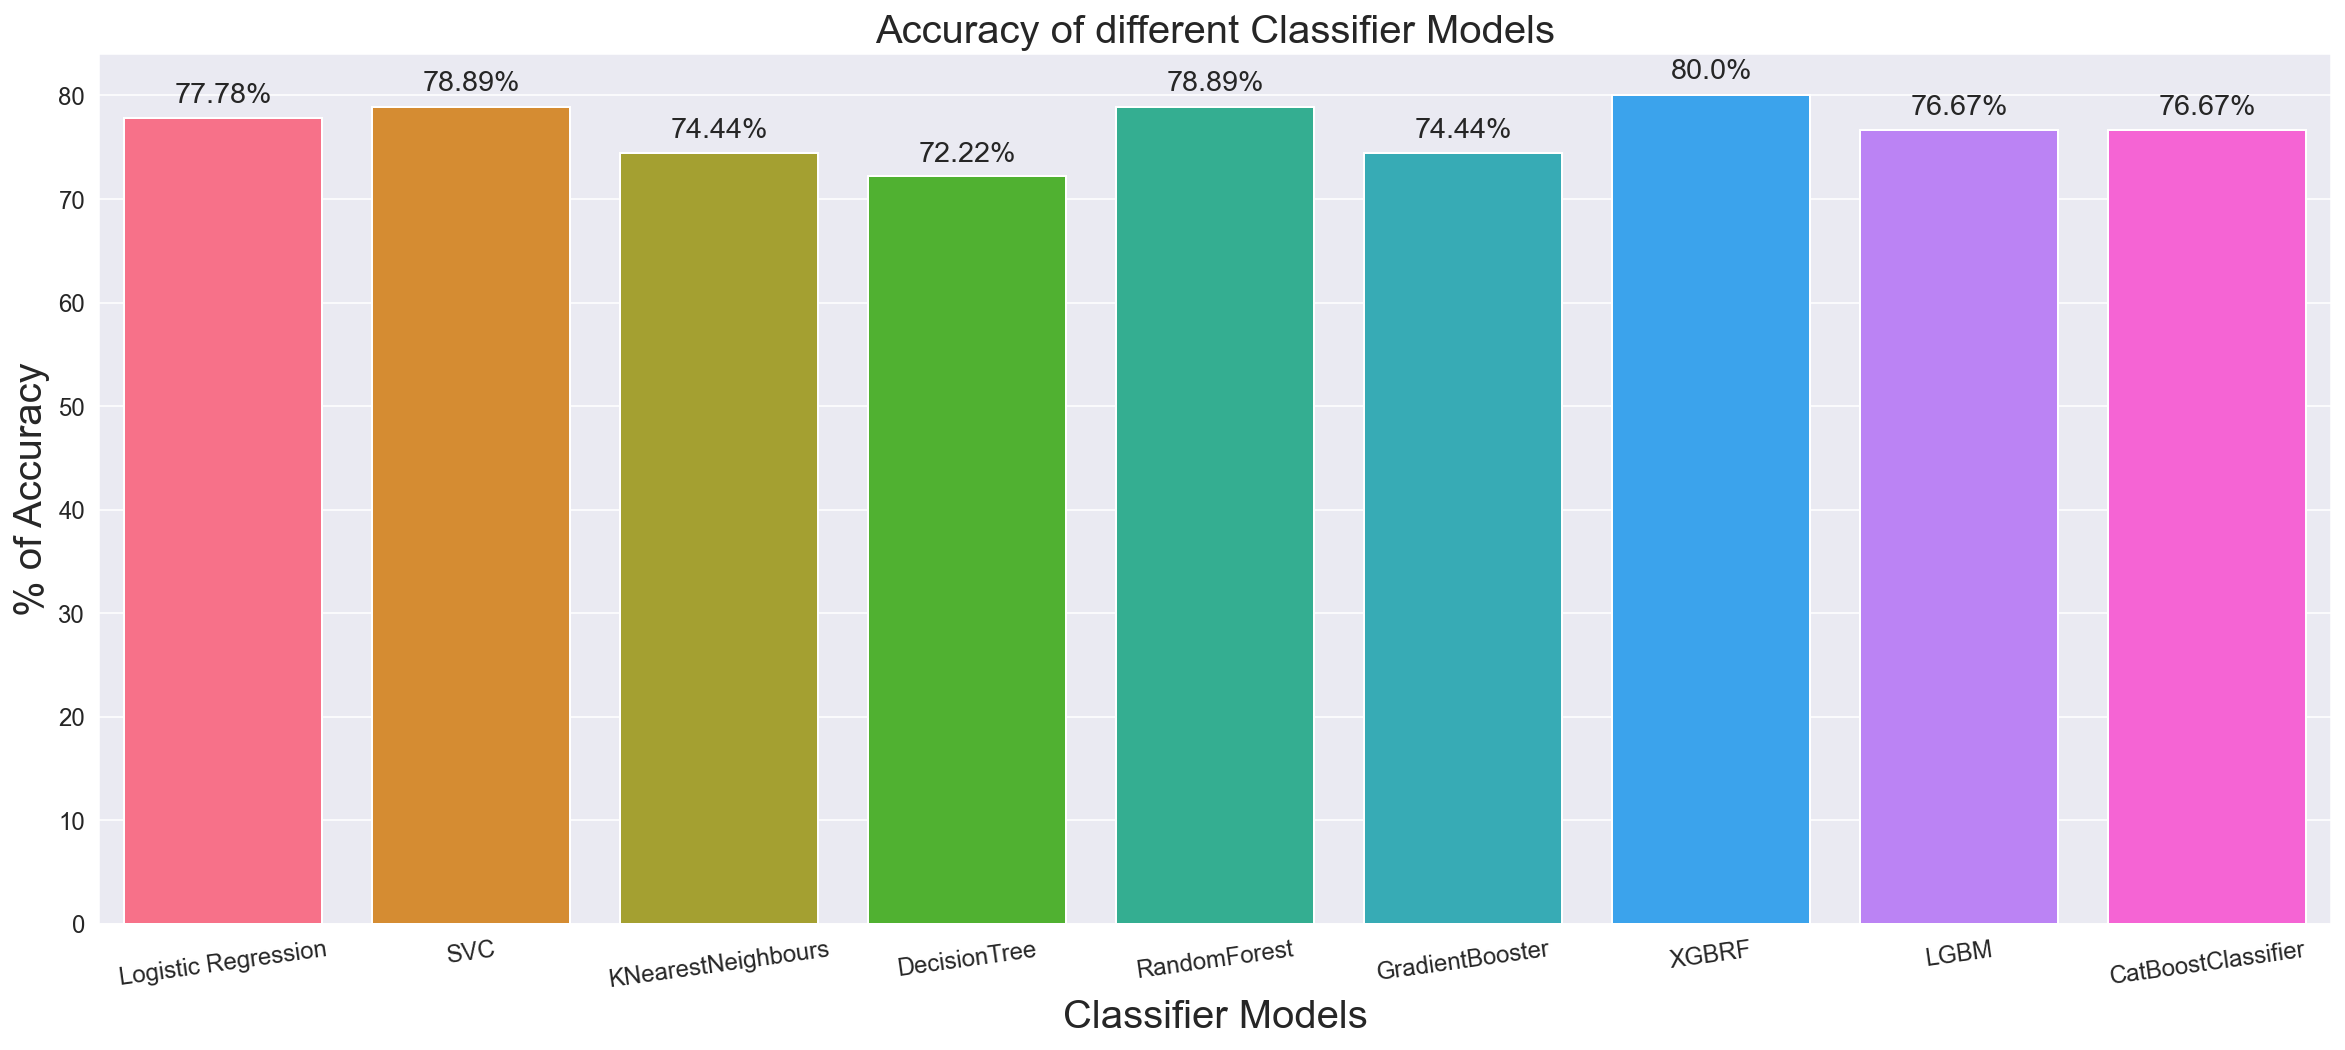

In [84]:
import seaborn as sns

plt.rcParams['figure.figsize']=20,8
sns.set_style('darkgrid')
ax = sns.barplot(x=model_list, y=accuracy_list, palette = "husl", saturation =2.0)
plt.xlabel('Classifier Models', fontsize = 20 )
plt.ylabel('% of Accuracy', fontsize = 20)
plt.title('Accuracy of different Classifier Models', fontsize = 20)
plt.xticks(fontsize = 12, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 12)
for i in ax.patches:
    width, height = i.get_width(), i.get_height()
    x, y = i.get_xy() 
    ax.annotate(f'{round(height,2)}%', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()